# Symbolic Aggregate approXimation *(SAX)* Encoding
## Distance DEMO

In [1]:
# at first time install pynuTS with this command
#!pip install git+https://github.com/nickprock/pynuTS.git@main

In [1]:
import pandas as pd
import numpy as np
from pynuTS.decomposition import NaiveSAX

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [3]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [5]:
time = np.arange(120)

np.random.seed(42)
a = np.random.randn(10)
b = np.random.beta(a[0], a[-1], 10)
c = np.random.normal(loc = 10, scale=0.05,size=10)
list_series = []
for i in range(10):
  noise = white_noise(time)
  temp = sigmoid(time, a[i], b[i], c[i]) + noise
  list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [6]:
X = pd.DataFrame(list_series).T

In [7]:
X

,0,1,2,3,4,5,6,7,8,9
0,5.508430,5.238845,5.339189,1.464355,5.462766,4.387677,4.580987,1.785015,5.084581,5.112259
1,6.250304,3.738249,4.768116,4.480335,4.860052,5.236391,9.454127,3.818437,4.823514,5.972482
2,7.676062,3.821294,8.164755,7.572622,3.637877,1.435047,9.232429,7.946049,5.599363,6.303565
3,6.050140,3.779636,7.331310,8.835671,4.601232,3.624755,10.360471,9.326472,1.347716,6.250820
4,8.928994,4.818381,9.399876,10.184037,2.796909,4.389657,11.250169,10.412765,2.062164,9.102861
...,...,...,...,...,...,...,...,...,...,...
115,10.455677,0.079242,10.297682,10.542108,-1.155135,-1.073769,9.702278,10.125506,0.818758,9.974562
116,9.572216,-1.120979,8.720178,9.012356,-0.047664,-1.537246,11.113758,8.748313,0.542113,11.163737
117,10.292976,0.294488,9.953754,11.495175,0.281915,0.477670,9.533121,9.027367,-1.658312,10.362292
118,9.008540,-0.411952,9.875467,9.450974,-0.343219,1.201919,10.803640,9.675519,0.944445,10.107094


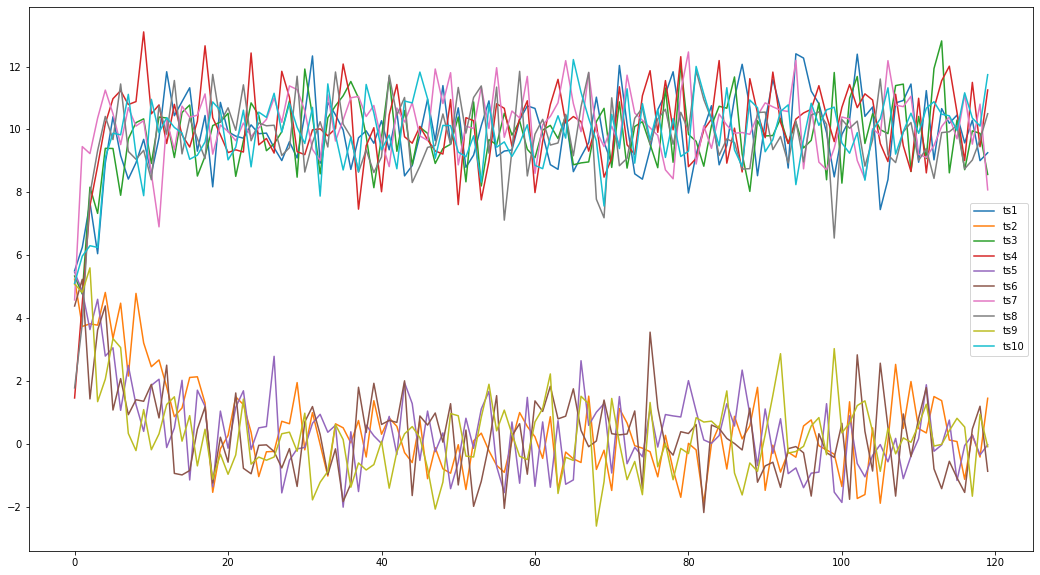

In [8]:
X.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Distance Matrix with SAX Encoding

We choose a window size 12. We reduct the 120 periods in 10 periods, a letter is a year.
You transpose X because each row must be a time series and each column a timestep.

In [9]:
sax = NaiveSAX(windows=24)

In [10]:
sax_strings = np.apply_along_axis(sax.fit_transform, 1, X.T)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** consisting in taking the mean over back-to-back points. This decreases the number of points and reduces noise while preserving the trend of the time series.
The labels for each level form the **SAX String** (like *'AAA'*)

<br>

![PAA](https://www.researchgate.net/profile/Bill-Chiu-2/publication/221653289/figure/fig7/AS:668838362349575@1536474900462/Symbolic-aggregate-approximation-of-a-time-series-as-the-four-letter-word-dbad-The.ppm)

<br>

In [11]:
sax_strings

array(['ABBCC', 'CCABB', 'ACBBC', 'ABBCC', 'CBBCA', 'CBCBA', 'ACCBB',
       'ABCCB', 'CABBC', 'ACBBC'], dtype='<U5')

### Choose the distance: Hamming
In information theory, the [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) between two strings of equal length is the number of positions at which the corresponding symbols are different.

Use the [scipy version](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html)


In [12]:
from scipy.spatial.distance import hamming

In [13]:
print("The distance between ", sax_strings[0], " and ", sax_strings[1], " is: ",hamming(list(sax_strings[0]), list(sax_strings[1])))

The distance between  ABBCC  and  CCABB  is:  1.0


In [14]:
# very dummy loop
for i in range(len(sax_strings)):
    for j in range(len(sax_strings)):
        print("The distance between ", sax_strings[i], " and ", sax_strings[j], " is: ",hamming(list(sax_strings[i]), list(sax_strings[j])))

The distance between  ABBCC  and  ABBCC  is:  0.0
The distance between  ABBCC  and  CCABB  is:  1.0
The distance between  ABBCC  and  ACBBC  is:  0.4
The distance between  ABBCC  and  ABBCC  is:  0.0
The distance between  ABBCC  and  CBBCA  is:  0.4
The distance between  ABBCC  and  CBCBA  is:  0.8
The distance between  ABBCC  and  ACCBB  is:  0.8
The distance between  ABBCC  and  ABCCB  is:  0.4
The distance between  ABBCC  and  CABBC  is:  0.6
The distance between  ABBCC  and  ACBBC  is:  0.4
The distance between  CCABB  and  ABBCC  is:  1.0
The distance between  CCABB  and  CCABB  is:  0.0
The distance between  CCABB  and  ACBBC  is:  0.6
The distance between  CCABB  and  ABBCC  is:  1.0
The distance between  CCABB  and  CBBCA  is:  0.8
The distance between  CCABB  and  CBCBA  is:  0.6
The distance between  CCABB  and  ACCBB  is:  0.4
The distance between  CCABB  and  ABCCB  is:  0.8
The distance between  CCABB  and  CABBC  is:  0.6
The distance between  CCABB  and  ACBBC  is:  0.6


## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
